In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
data = []
labels = []
classes = 11
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((32,32))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.20, random_state=6)  

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
# chia tỷ lệ dữ liệu trong phạm vi [0, 1]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255

#Mã hoá nhãn
from keras.utils import to_categorical
y_train = to_categorical(y_train, 11)
y_val = to_categorical(y_val, 11)

(9359, 32, 32, 3) (2340, 32, 32, 3) (9359,) (2340,)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Tăng cường dữ liệu
train_datagen = ImageDataGenerator(
	rotation_range=10,
	zoom_range=0.15,
	width_shift_range=0.1,
	height_shift_range=0.1,
	shear_range=0.15,
	horizontal_flip=False,
	vertical_flip=False,
	fill_mode="nearest")
train_generator = train_datagen.flow(
    X_train,
    y_train,
	batch_size=32)

In [ ]:
model = Sequential()

# Add the first convolutional layer with 64 filters, kernel size of 3x3, padding "same", and ReLU activation
model.add(Conv2D(input_shape=(32, 32, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))

# Add the second convolutional layer with 64 filters, kernel size of 3x3, padding "same", and ReLU activation
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))

# Add the first max pooling layer with pool size 2x2 and stride 2x2
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Continue adding more convolutional and max pooling layers with increasing number of filters
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten the output from the previous layers
model.add(Flatten())

# Add two fully connected layers with 4096 units and ReLU activation
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))

# Add the output layer with 43 units and softmax activation for multi-class classification
model.add(Dense(units=11, activation="softmax"))

# Print the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                   

In [ ]:
#Tối ưu model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_generator, epochs=30,validation_data=(X_val, y_val))
model.save("vgg16.keras")

Epoch 1/30
293/293 [==============================] - 580s 2s/step - loss: 2.2435 - accuracy: 0.1811 - val_loss: 2.2612 - val_accuracy: 0.1679
Epoch 2/30
293/293 [==============================] - 555s 2s/step - loss: 2.2357 - accuracy: 0.1848 - val_loss: 2.2469 - val_accuracy: 0.1816
Epoch 3/30
293/293 [==============================] - 555s 2s/step - loss: 2.2336 - accuracy: 0.1854 - val_loss: 2.2428 - val_accuracy: 0.1816
Epoch 4/30
293/293 [==============================] - 555s 2s/step - loss: 2.2344 - accuracy: 0.1861 - val_loss: 2.2412 - val_accuracy: 0.1816
Epoch 5/30
293/293 [==============================] - 555s 2s/step - loss: 2.2338 - accuracy: 0.1821 - val_loss: 2.2420 - val_accuracy: 0.1816
Epoch 6/30
293/293 [==============================] - 554s 2s/step - loss: 2.2334 - accuracy: 0.1816 - val_loss: 2.2474 - val_accuracy: 0.1679
Epoch 7/30
293/293 [==============================] - 554s 2s/step - loss: 2.2329 - accuracy: 0.1834 - val_loss: 2.2427 - val_accuracy: 0.1679

KeyboardInterrupt: 

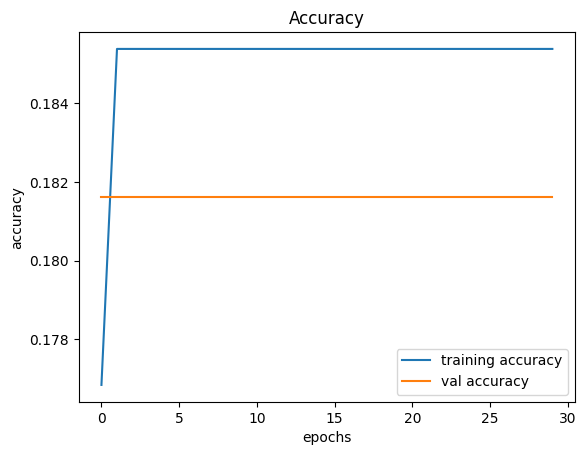

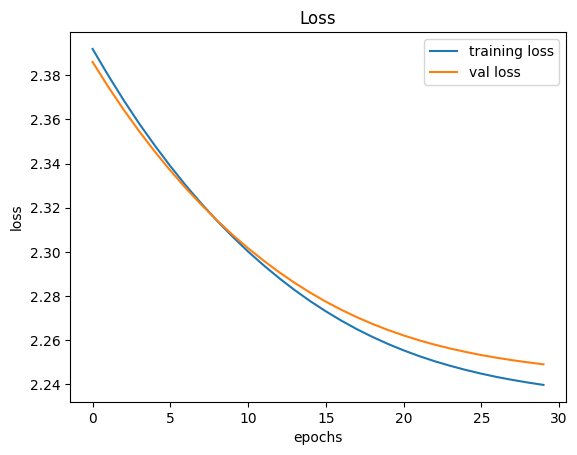

In [ ]:
# Vẽ đồ thị cho độ chính xác

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
 
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from keras.models import load_model
model = load_model('vgg16.keras')
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((32,32))
    data.append(np.array(image))

X_test=np.array(data)
pred = np.argmax(model.predict(X_test), axis=-1)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

119/119 [==============================] - 22s 185ms/step
0.19047619047619047
